In [54]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
df=pd.read_csv("/content/HCLTECH.csv")
df = df[['Date','Prev Close']]
print(df)

            Date  Prev Close
0     2000-01-11      580.00
1     2000-01-12     1554.45
2     2000-01-13     1678.85
3     2000-01-14     1813.20
4     2000-01-17     1958.30
...          ...         ...
5193  2020-11-23      819.25
5194  2020-11-24      839.20
5195  2020-11-25      840.50
5196  2020-11-26      824.70
5197  2020-11-27      842.05

[5198 rows x 2 columns]


In [56]:
def adfuller_test(df):
    result=adfuller(df)
    #print(result)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [57]:
adfuller_test(df['Prev Close'])

ADF Test Statistic : -4.02383795285514
p-value : 0.0012907058197707305
Lags Used : 33
Number of Observations Used : 5164
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [58]:

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Prev Close'])
print(test_result)

df['Seasonal_Difference']=df['Prev Close']-df['Prev Close'].shift(1)
test_result=adfuller(df['Seasonal_Difference'].dropna())
print(test_result)

df['Seasonal_Difference']=df['Prev Close']-df['Prev Close'].shift(34)
test_result=adfuller(df['Seasonal_Difference'].dropna())
print(test_result)



(-4.02383795285514, 0.0012907058197707305, 33, 5164, {'1%': -3.431616954601018, '5%': -2.86209986084596, '10%': -2.56706801393458}, 48833.8741194518)
(-15.763872864896127, 1.1828348703238762e-28, 33, 5163, {'1%': -3.4316172001143523, '5%': -2.8620999693139497, '10%': -2.567068071676066}, 48832.71871212932)
(-12.703675417086664, 1.0664373512270598e-23, 33, 5130, {'1%': -3.4316253557783787, '5%': -2.862103572487834, '10%': -2.5670699897784313}, 51752.506973694486)


In [59]:
adfuller_test(df['Seasonal_Difference'].dropna())

ADF Test Statistic : -12.703675417086664
p-value : 1.0664373512270598e-23
Lags Used : 33
Number of Observations Used : 5130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


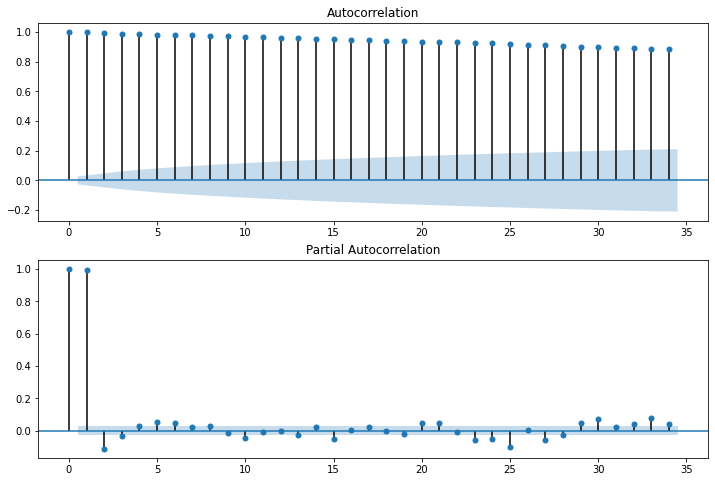

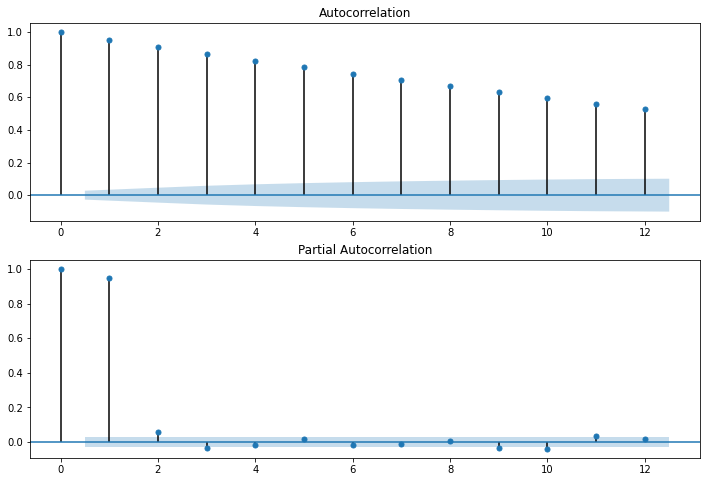

In [60]:
import statsmodels.api as sm
#value
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Prev Close'], lags=34, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Prev Close'], lags=34, ax=ax2)
plt.show()
#seasonal diff
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal_Difference'].dropna(), lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal_Difference'].dropna(), lags=12, ax=ax2)
plt.show()


In [61]:
from statsmodels.tsa.arima_model import ARMA
ARMAmodel=ARMA(df['Prev Close'],order=(1,1))
ARmodel_fit=ARMAmodel.fit()
actuals=df['Prev Close'][2000:2020]
print("actuals:",actuals)
ypredicted=ARmodel_fit.predict(2000,2019)
print("ypredict:",ypredicted)


actuals: 2000    328.70
2001    329.65
2002    322.05
2003    314.35
2004    310.00
2005    315.05
2006    299.30
2007    300.85
2008    300.10
2009    296.20
2010    288.90
2011    283.90
2012    276.90
2013    269.05
2014    267.70
2015    266.35
2016    249.15
2017    229.85
2018    240.35
2019    230.25
Name: Prev Close, dtype: float64
ypredict: 2000    318.088732
2001    331.282496
2002    330.661490
2003    322.198440
2004    314.626783
2005    310.706488
2006    316.884585
2007    298.390489
2008    302.499993
2009    301.130956
2010    296.922524
2011    289.255876
2012    284.617128
2013    277.342767
2014    269.450353
2015    268.943171
2016    267.490666
2017    248.343474
2018    229.100792
2019    243.366081
dtype: float64


In [62]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(actuals,ypredicted)
print('MAE:%f' %mae)
print("AR MODEL FIT:",ARmodel_fit.aic)


MAE:7.999014
AR MODEL FIT: 50823.95002169813


In [ ]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_absolute_error
import itertools 
i=j=range(0,4)
ij=itertools.product(i,j)
for parameters in ij:
    try:
        mod=ARMA(df['Prev Close'],order=parameters)
        results=mod.fit()
        ypredicted=results.predict(2000,2003)
        mae=mean_absolute_error(actuals,ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters,mae))#print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue


In [ ]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_absolute_error
ARMAmodel=ARMA(df['Prev Close'],order=(1,2))
ARmodel_fit=ARMAmodel.fit()
actuals=df['Prev Close'][2000:2020]
print("actuals:",actuals)
ypredicted=ARmodel_fit.predict(2000,2019)
print(ypredicted)
mae=mean_absolute_error(actuals,ypredicted)
print('MAE:%f' %mae)
print(ARmodel_fit.aic)


In [ ]:
import itertools 
i=j=range(0,4)
ij=itertools.product(i,j)
for parameters in ij:
    try:
        mod=ARMA(df['Seasonal_Difference'].dropna(),order=parameters)
        results=mod.fit()
        ypredicted=results.predict(2000,2003)# end point included
        mae=mean_absolute_error(actuals,ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters,mae))#print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue
df['Seasonal_Difference']


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
ARIMAmodel=ARIMA(df['Prev Close'],order=(1,1,1))

#notice p,d and q value here
ARIMA_model_fit=ARIMAmodel.fit()

# make prediction
actuals=df['Prev Close'][2000:2020]
print("actuals for ARIMA:",actuals)
ypredicted=ARIMA_model_fit.predict(2000,2019)
print("Ypredicted for arima:",ypredicted)


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(actuals,ypredicted)
print('MAE:%f' %mae)


In [ ]:
import itertools 
p=d=q=range(0,4)
pdq=itertools.product(p,d,q)
for parameters in pdq:
    try:
        ARIMAmodel=ARIMA(df['Prev Close'],order=parameters)
        results=ARIMAmodel.fit()
        ypredicted=results.predict(2000,2020)# end point included
        mae=mean_absolute_error(actuals,ypredicted)
        print('ARiMA{} - MAE:{}'.format(parameters,mae))
    except:
        continue

from statsmodels.tsa.arima_model import ARIMA
ARIMAmodel=ARIMA(df['Prev Close'],order=(1,0,2))
ARIMA_model_fit=ARIMAmodel.fit()

actuals=df['Prev Close'][2000:2020]
print("actuals for ARIMA:",actuals)
ypredicted=ARIMA_model_fit.predict(2000,2019)
print("Ypredicted for arima:",ypredicted)


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(actuals,ypredicted)
print('Arima MAE:%f'  %mae)
print(ARIMA_model_fit.aic)

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

Sarima=sm.tsa.statespace.SARIMAX(df['Prev Close'],order=(1,1,1), seasonal_order=(1,0,2,8))
Sarima_fit=Sarima.fit()
ypredicted=Sarima_fit.predict(2000,2003)
print("ypredicted for sarima:",ypredicted)
actuals=df['Prev Close'][2000:2004]
mae=mean_absolute_error(actuals,ypredicted)
print('SARIMA MAE:%f'  %mae)